
# Task3

## Table of Contents
### 1. Data Cleaning and Preprocessing
### 2. Build Classifier
### 3. Conclusion


###### Import libraries

In [15]:
import pandas as pd
from nltk.tokenize import word_tokenize,RegexpTokenizer
from bidi.algorithm import get_display
from sklearn.feature_extraction.text import CountVectorizer ,TfidfVectorizer
from sklearn.utils import shuffle
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, precision_recall_fscore_support,confusion_matrix, plot_confusion_matrix,accuracy_score
import matplotlib.pyplot as plt

In [2]:
# read data set and concat different files
Data_Stories = pd.DataFrame()
Files = ["tamazight","sport","societe","regions","politique","orbites","medias","marocains-du-monde","faits-divers","economie","art-et-culture"]
# read each file in our dataset
for File in Files:
  Data_Stories = pd.concat([Data_Stories,pd.read_csv("stories_"+File+".csv",encoding='utf-8')])

In [3]:
Data_Stories.head()

,Unnamed: 0,id,title,date,author,story,topic
0,0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight
1,1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight
2,2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight
3,3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight
4,4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight


In [4]:
# remove unwanted columns
Data_Stories.drop(columns=["Unnamed: 0"],axis=1,inplace=True)

In [5]:
# check the dataframe
Data_Stories.tail()

,id,title,date,author,story,topic
995,97e7b078055311eb972a646e69d991ea,مِهَنيّون: غياب توقيع رئيس الحكومة يوقف 200 مش...,الاثنين 18 نونبر 2019 - 00:25,هسبريس - وائل بورشاشن,تستمرّ الآثار الجانبية للانتقال الحكومي الأخير...,art-et-culture
996,98f7723e055311ebb811646e69d991ea,"ندوة تقارب ""جهود السوسيين"" في خدمة العربية",الأحد 17 نونبر 2019 - 11:15,الحسين حرّان,"قال الدكتور المهدي السعيدي، في ندوة حول ""جهود ...",art-et-culture
997,9a29bc06055311ebbb05646e69d991ea,تتويج أشرطة في مهرجان سينما الذاكرة المشتركة,السبت 16 نونبر 2019 - 20:17,هسبريس من الرباط,أجمعت لجنة المسابقة الخاصة بالأفلام المغربية ا...,art-et-culture
998,9b547968055311ebb870646e69d991ea,ريشة التشكيلية بثينة أزمي تتمرد على الظلم والع...,السبت 16 نونبر 2019 - 10:00,هسبريس - كاميليا كريم,ألوان حيّة ولمسات تعبيرية تحْمل مآسي إنسانية ل...,art-et-culture
999,9c6b8f50055311eb9c5c646e69d991ea,"مسرحية ""بوحجبان"" تبدأ جولة وطنية من مدينة خريبكة",السبت 16 نونبر 2019 - 04:20,هسبريس من الرباط,"تقوم فرقة مسرح ""سفر"" بجولة وطنية لتقديم مسرحيت...",art-et-culture


In [6]:
Data_Stories.shape

(11000, 6)

## Data Cleaning
1. Removing Stop Words.
2. Removing Punctuation.

In [7]:
# Open the file containing the list of stop words and read its contents into a list
stop_words = open('list.txt', 'r', encoding='utf-8').read().splitlines() 

# Define a function to remove stop words from a given text using a list of stopwords
def removeStopWords(text, stopwords):
    # Tokenize the text into individual words
    text_tokens = word_tokenize(text)
    # Remove any words that are in the list of stopwords
    return " ".join([word for word in text_tokens if not word in stopwords])

# Define a function to remove punctuation from a given text
def removePunctuation(text):
    # Create a tokenizer that matches any sequence of one or more alphanumeric characters
    tokenizer = RegexpTokenizer(r'\w+')
    # Tokenize the text using the tokenizer and join the resulting tokens back into a string
    return " ".join(tokenizer.tokenize(text))


In [8]:
# Define a function to preprocess a given text by removing stop words and punctuation
def preprocessText(text, stopwords):
    # Remove stop words from the text
    text_no_stopwords = removeStopWords(text, stopwords)
    # Remove punctuation from the text
    text_no_punctuation = removePunctuation(text_no_stopwords)
    # If the wordcloud flag is set to False, return the text without reshaping it
    return text_no_punctuation

In [9]:
#Clean the stories 
Data_Stories["storyClean"]=Data_Stories["story"].apply(lambda s: preprocessText(s,stop_words))


In [10]:
Data_Stories.head()

,id,title,date,author,story,topic,storyClean
0,9de52a46055311eb8949646e69d991ea,وزارة التربية: لا تغيير في الغلاف الزمني للأما...,السبت 03 أكتوبر 2020 - 00:02,هسبريس من الرباط,قالت وزارة التربية الوطنية والتكوين المهني وال...,tamazight,قالت وزارة التربية الوطنية والتكوين المهني وال...
1,9ee74b02055311ebb757646e69d991ea,"""تغييب"" تدريس الأمازيغية يغضب نقابات بتزنيت",الاثنين 28 شتنبر 2020 - 09:13,رشيد بيجيكن من أكادير,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...,tamazight,طالبت الكتابة الإقليمية للجامعة الوطنية للتعلي...
2,9fed7812055311eb9158646e69d991ea,مرصد يستنكر رفض قبول أستاذة أمازيغية بمدرسة,الاثنين 28 شتنبر 2020 - 00:41,هسبريس من الرباط,أفاد المرصد الأمازيغي للحقوق والحريات أنه توصل...,tamazight,أفاد المرصد الأمازيغي للحقوق والحريات توصل بمع...
3,a0e39038055311eb8f78646e69d991ea,نص امتحان موحد يثير حنق فعاليات أمازيغية,السبت 26 شتنبر 2020 - 17:28,هسبريس من الرّباط,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها من ...,tamazight,سجلت فعاليات مدنية أمازيغية عديدة امتعاضها نص ...
4,a1d90814055311eb879e646e69d991ea,"""عادل تيزنيت"" يتحف المغاربة بالموسيقى الأمازيغية",السبت 26 شتنبر 2020 - 15:50,هسبريس من الرباط,من داخل سيارة بسيطة يركنها بالمدخل الشمالي لمد...,tamazight,داخل سيارة بسيطة يركنها بالمدخل الشمالي لمدينة...


### Take the last 20% of each file as a test-set

In [11]:
# Take the first 800 rows of Data_Stories as the initial training data
train_data = Data_Stories.iloc[0:800]
# Take the next 200 rows of Data_Stories as the initial test data
test_data = Data_Stories.iloc[800:1000]

# Loop over the remaining rows of Data_Stories in increments of 1000
for i in range(1000, len(Data_Stories), 1000):
    # Take the next 800 rows of Data_Stories as the current training data
    current_train_data = Data_Stories.iloc[i:i+800] # e.g., 1000 to 1800, 2000 to 2800
    # Take the next 200 rows of Data_Stories as the current test data
    current_test_data = Data_Stories.iloc[i+800:i+1000] # e.g., 1800 to 2000, 2800 to 3000
    
    # Concatenate the current training data with the previous training data
    train_data = pd.concat([train_data, current_train_data], ignore_index=True)
    # Concatenate the current test data with the previous test data
    test_data = pd.concat([test_data, current_test_data], ignore_index=True)

In [12]:
len(test_data)/len(Data_Stories)

0.2

## Build Classifier (SGD)

SGD Classifier
                    precision    recall  f1-score   support

    art-et-culture       0.83      0.89      0.86       200
          economie       0.76      0.83      0.80       200
      faits-divers       0.89      0.94      0.91       200
marocains-du-monde       0.85      0.83      0.84       200
            medias       0.91      0.86      0.88       200
           orbites       0.56      0.49      0.53       200
         politique       0.70      0.80      0.74       200
           regions       0.84      0.79      0.81       200
           societe       0.70      0.59      0.64       200
             sport       0.94      0.96      0.95       200
         tamazight       0.93      0.96      0.95       200

          accuracy                           0.81      2200
         macro avg       0.81      0.81      0.81      2200
      weighted avg       0.81      0.81      0.81      2200



D:\anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


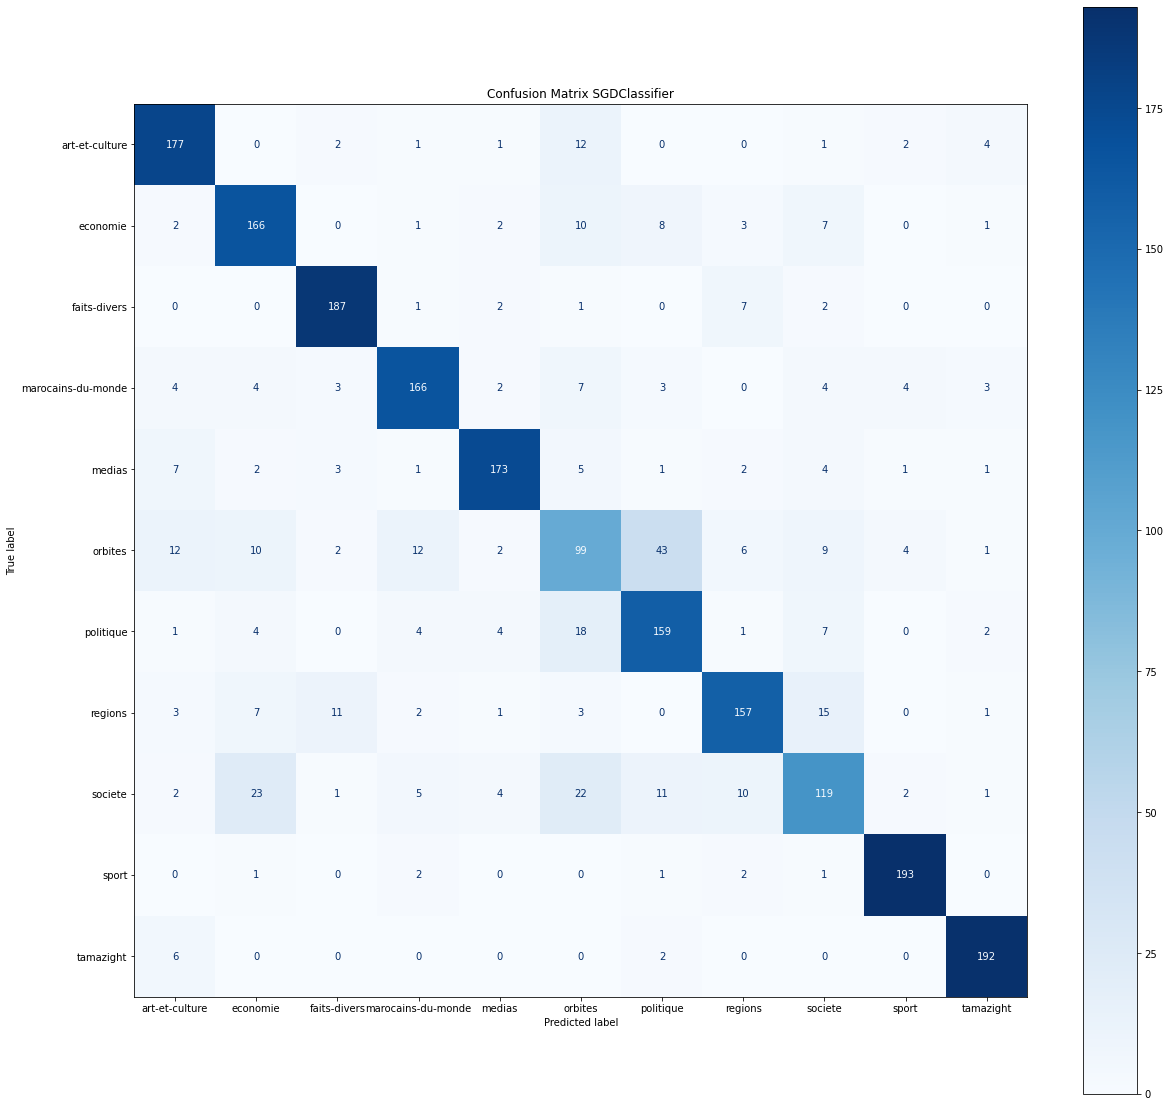

Accuracy by class: {'art-et-culture': 0.885, 'economie': 0.83, 'faits-divers': 0.935, 'marocains-du-monde': 0.83, 'medias': 0.865, 'orbites': 0.495, 'politique': 0.795, 'regions': 0.785, 'societe': 0.595, 'sport': 0.965, 'tamazight': 0.96}
Precision for whole dataset: 0.8098844278685067
Recallfor whole dataset: 0.8127272727272727
F1-Score for whole dataset: 0.8100076267225738
Accuracy for whole dataset: 0.8127272727272727


In [19]:
def SGDClassifier_(train_data, test_data):
    # Shuffle the training data
    shuffled_train = shuffle(train_data)

    # Split the training and test data 
    X_train = shuffled_train["storyClean"]
    y_train = shuffled_train["topic"]
    
    X_test = test_data["storyClean"]
    y_test = test_data["topic"]

    # Vectorize the input data using a CountVectorizer
    vectorizer = CountVectorizer()
    X_train_vectorized = vectorizer.fit_transform(X_train)
    X_test_vectorized = vectorizer.transform(X_test)
   
    # Create an instance of the SGDClassifier with a maximum of 1000 iterations and a tolerance of 1e-3
    clf = SGDClassifier(max_iter=1000, tol=1e-3)
    
    # Fit the classifier to the vectorized training data and target variables
    clf.fit(X_train_vectorized, y_train)

    # Make predictions on the vectorized test data and print the classification report
    y_pred = clf.predict(X_test_vectorized)
    print('SGD Classifier')
    print(classification_report(y_test, y_pred))

    # Draw the confusion matrix 
    disp = plot_confusion_matrix(clf, X_test_vectorized, y_test, cmap=plt.cm.Blues, display_labels=clf.classes_)
    disp.ax_.set_title("Confusion Matrix SGDClassifier")
    disp.ax_.grid(False)  
    plt.gcf().set_size_inches(20, 20) 
    plt.show()
    
    # Calculate and print accuracy for each class
    accuracy_dict = {}
    for c in clf.classes_:
        indices = y_test == c
        accuracy = accuracy_score(y_test[indices], y_pred[indices])
        accuracy_dict[c] = accuracy
    print('Accuracy by class:', accuracy_dict)

    # Calculate and print precision, recall, f-score, and accuracy for the entire test data
    precision, recall, f_score, support = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)
    
    print('Precision for whole dataset:', precision)
    print('Recallfor whole dataset:', recall)
    print('F1-Score for whole dataset:', f_score)
    print('Accuracy for whole dataset:', accuracy)

# Call SGD Classifier
SGDClassifier_(train_data, test_data)

# Conclusion


## Describe briefly the meaning of each result using Tamazight Class

Based on the provided information, we can do the following analysis for the **Tamazight** class:

**Precision**: The precision of the Tamazight class is 0.93, which means that out of all the instances predicted as Tamazight, 93% of them were actually Tamazight.

**Recall**: The recall of the Tamazight class is 0.96, which means that out of
all the actual instances that are Tamazight, 96% of them were correctly predicted as Tamazight.

**F1 Score**: The F1 score of the Tamazight class is 0.95, which is the harmonic mean of precision and recall. It is a balanced measurethat takes both precision and recall into account.

To calculate the **accuracy** for the Tamazight class,we need to know the number of correctly classified instances of Tamazight in the test set. Let's assume that the classifier correctly 
classified 192 instances in the Tamazight test set out of 200. Then, 
the accuracy for the Tamazight class would be:

**Accuracy** = (number of correctly classified 
instances) / (total number of instances) = 192 / 200 = 0.96

Therefore, the accuracy for the Tamazight class is 96%. This means that out of all the 
instances in the Tamazight test set, 95% were correctly classified by the classifier.

### -----------------------------------------------------------------------------------------

## A confusion matrix
is a table that is often used to evaluate the performance of a classifier on a set of test data for which the true values are known. It compares the predicted class labels with the true class labels and shows how often the classifier correctly or incorrectly predicted each class.

The confusion matrix contains four elements: true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN).

**True positives (TP)** are the number of instances that were correctly classified as positive by the classifier. This means that the instance was actually positive and the classifier predicted it as positive.

**True negatives (TN)** are the number of instances that were correctly classified as negative by the classifier. This means that the instance was actually negative and the classifier predicted it as negative.

**False positives (FP)** are the number of instances that were incorrectly classified as positive by the classifier. This means that the instance was actually negative but the classifier predicted it as positive.

**False negatives (FN)** are the number of instances that were incorrectly classified as negative by the classifier. This means that the instance was actually positive but the classifier predicted it as negative.

The confusion matrix is often visualized as a table with the predicted class labels on the horizontal axis and the true class labels on the vertical axis. The number of instances that fall into each category (TP, TN, FP, FN) is then displayed in the corresponding cell of the table.

By analyzing the values in the confusion matrix, we can calculate various performance metrics for the classifier, such as accuracy, precision, recall, and F1 score. These metrics provide further insights into the classifier's performance and can help us evaluate and improve the model.

### -----------------------------------------------------------------------------------------
## Some enhancements that I may think about to achieve better results.

**1.Feature Engineering**: The features used to train the classifier play a critical role in determining its performance. I may want to experiment with different feature extraction techniques or try creating new features from the existing ones to improve the model's accuracy. For example, you could try using more advanced techniques such as word embeddings or topic modeling to extract more meaningful features from the text data.

**2.Data Augmentation**: Sometimes, the classifier may not have enough training data to learn from, which can lead to poor performance. I could try augmenting the existing training data by adding more samples .